In [5]:
# packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

# visualize your data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# allows charts to appear in the notebook
%matplotlib inline

In [24]:
# Import the dataset
dataset = pd.read_csv("cars.csv")

In [31]:
dataset.shape

(261, 8)

In [32]:
#check for null value 
dataset.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [33]:
#lets print column names of dataset
dataset.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [34]:
#column names have a space before the name so rename it
for col in dataset.columns:
    dataset.rename(columns={col: col.strip()}, inplace=True)
dataset.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [35]:
# check columns data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [36]:
#check for null value again
dataset.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [37]:
dataset['cubicinches'].mode()

0    97
Name: cubicinches, dtype: object

In [50]:
# change columns type from object to numeric
dataset['cubicinches'] = pd.to_numeric(dataset['cubicinches'], errors='coerce')
dataset['weightlbs'] = pd.to_numeric(dataset['weightlbs'], errors='coerce')

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [43]:
dataset['cubicinches'].mode()

0    97.0
Name: cubicinches, dtype: float64

In [65]:
dataset['cubicinches']= dataset['cubicinches'].fillna(dataset['cubicinches'].mode()[0])
dataset['weightlbs'] = dataset['weightlbs'].fillna(dataset['weightlbs'].mean())

In [66]:
# remove the brand column since it has strings
X = dataset[dataset.columns[:-1]]

# eliminating null values in columns with the mean of the column
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


C:\Users\Admin\AppData\Local\Temp\ipykernel_13020\4207926116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].fillna(int(X[i].mean()))


In [69]:
#check for null value again
X.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

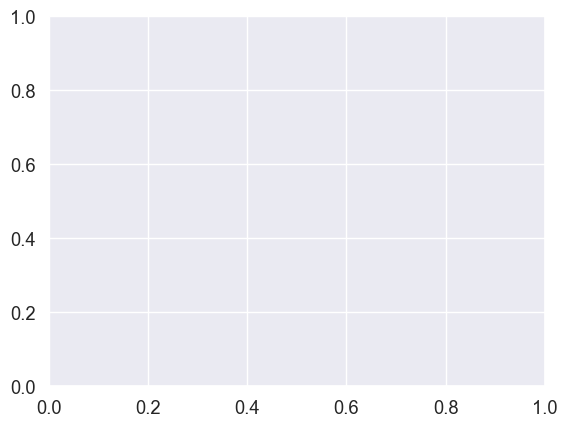

In [71]:
# using the elbow method to find the optimal numbers of clusters

from sklearn.cluster import KMeans

# WSS (Within sum of squares) - sum of squared distance between each member of the cluster
# and its centroid
wcss = []

# train our AI eleven times
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,12),wcss)
plt.title("TheElbow Method")
plt.xlabel("Numbe of clusters")
plt.ylabel("WCSS")
plt.show()